In [43]:
import os
import re
import pandas as pd
import locale
%pip install matplotlib
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


'es_ES.UTF-8'

In [ ]:
carpeta = input("Ingrese la ruta de la carpeta donde se encuentran los archivos: ")
os.chdir(carpeta)

# **Renombrar archivos**

In [6]:
def renombrar_archivos_mes_año(carpeta):
    """
    Renombra archivos del formato pv_MMAAAA o pvMMAAAA a formato 'mes_año'
    Ejemplo: pv_022025.xlsx -> febrero_2025.xlsx
    """
    
    # Diccionario de meses
    meses = {
        '01': 'enero',
        '02': 'febrero',
        '03': 'marzo',
        '04': 'abril',
        '05': 'mayo',
        '06': 'junio',
        '07': 'julio',
        '08': 'agosto',
        '09': 'septiembre',
        '10': 'octubre',
        '11': 'noviembre',
        '12': 'diciembre'
    }
    
    # Extensiones de Excel a procesar
    extensiones = ['.xlsx', '.xls', '.xlsm']
    
    # Patrones para detectar los dos formatos
    patron1 = r'pv_(\d{2})(\d{4})'  # pv_022025
    patron2 = r'pv(\d{2})(\d{4})'
    patron3 = r'pv(\d{2})(\d{4})_'# pv012021
    
    archivos_renombrados = 0
    
    for archivo in os.listdir(carpeta):
        # Verificar si es un archivo Excel
        nombre, extension = os.path.splitext(archivo)
        if extension.lower() not in extensiones:
            continue
        
        # Intentar con ambos patrones
        match = re.match(patron1, nombre) or re.match(patron2, nombre) or re.match(patron3, nombre)
        
        if match:
            mes_num = match.group(1)
            año = match.group(2)
            
            # Validar que el mes sea válido
            if mes_num in meses:
                mes_texto = meses[mes_num]
                nuevo_nombre = f"{mes_texto}_{año}{extension}"
                
                ruta_original = os.path.join(carpeta, archivo)
                ruta_nueva = os.path.join(carpeta, nuevo_nombre)
                
                try:
                    # Verificar si ya existe un archivo con el nuevo nombre
                    if os.path.exists(ruta_nueva):
                        print(f"⚠ Ya existe: {nuevo_nombre} (no se renombró {archivo})")
                    else:
                        os.rename(ruta_original, ruta_nueva)
                        print(f"✓ {archivo} → {nuevo_nombre}")
                        archivos_renombrados += 1
                except Exception as e:
                    print(f"✗ Error con {archivo}: {e}")
            else:
                print(f"⚠ Mes inválido en: {archivo}")
        else:
            print(f"⚠ No coincide con el patrón: {archivo}")
    
    print(f"\n📊 Total de archivos renombrados: {archivos_renombrados}")

In [7]:
print("\n¿Deseas renombrar los archivos? (s/n): ", end="")
respuesta = input().lower()
if respuesta == 's':
    print("\nRenombrando archivos...\n")
    renombrar_archivos_mes_año(carpeta)
else:
    print("\nOperación cancelada.")


¿Deseas renombrar los archivos? (s/n): 
Renombrando archivos...

⚠ No coincide con el patrón: abril_2020.xlsx
⚠ No coincide con el patrón: abril_2021.xlsx
⚠ No coincide con el patrón: abril_2022.xlsx
⚠ No coincide con el patrón: agosto_2020.xlsx
⚠ No coincide con el patrón: agosto_2021.xlsx
⚠ No coincide con el patrón: agosto_2022.xlsx
⚠ No coincide con el patrón: datos_unidos_2020_2022.xlsx
⚠ No coincide con el patrón: diciembre_2020.xlsx
⚠ No coincide con el patrón: diciembre_2021.xlsx
⚠ No coincide con el patrón: diciembre_2022.xlsx
⚠ No coincide con el patrón: enero_2021.xlsx
⚠ No coincide con el patrón: enero_2022.xlsx
⚠ No coincide con el patrón: febrero_2020.xlsx
⚠ No coincide con el patrón: febrero_2021.xlsx
⚠ No coincide con el patrón: febrero_2022.xlsx
⚠ No coincide con el patrón: File.xlsx
⚠ No coincide con el patrón: IRL.xlsx
⚠ No coincide con el patrón: IRL_limpio.xlsx
⚠ No coincide con el patrón: julio_2020.xlsx
⚠ No coincide con el patrón: julio_2021.xlsx
⚠ No coincide 

# **Union y limpieza de datos de archivos Excel mensuales en un solo archivo consolidado.**



In [8]:
meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 
         'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
años = [2020, 2021, 2022]

In [9]:
dataframes = []
archivos_leidos = 0
archivos_no_encontrados = 0

print("Iniciando proceso de unión...\n")

for año in años:
    for mes in meses:
        try:
            # Construir nombre del archivo: mes_año.xlsx
            nombre_archivo = f"{mes}_{año}.xlsx"
            ruta_completa = os.path.join(carpeta, nombre_archivo)
            
            # Leer el archivo Excel
            df = pd.read_excel(ruta_completa, sheet_name='PV3', skiprows=6)
            
            # Agregar columnas de referencia
            df['mes'] = mes
            df['año'] = año
            
            dataframes.append(df)
            archivos_leidos += 1
            print(f"✓ Leído: {nombre_archivo} ({len(df)} filas)")
            
        except FileNotFoundError:
            archivos_no_encontrados += 1
            print(f"✗ No encontrado: {mes}_{año}.xlsx")
        except Exception as e:
            print(f"✗ Error al leer {mes}_{año}.xlsx: {str(e)}")

Iniciando proceso de unión...

✗ No encontrado: enero_2020.xlsx
✓ Leído: febrero_2020.xlsx (71 filas)
✓ Leído: marzo_2020.xlsx (71 filas)
✓ Leído: abril_2020.xlsx (72 filas)
✓ Leído: mayo_2020.xlsx (72 filas)
✓ Leído: junio_2020.xlsx (72 filas)
✓ Leído: julio_2020.xlsx (79 filas)
✓ Leído: agosto_2020.xlsx (73 filas)
✓ Leído: septiembre_2020.xlsx (73 filas)
✓ Leído: octubre_2020.xlsx (73 filas)
✓ Leído: noviembre_2020.xlsx (73 filas)
✓ Leído: diciembre_2020.xlsx (71 filas)
✓ Leído: enero_2021.xlsx (70 filas)
✓ Leído: febrero_2021.xlsx (70 filas)
✓ Leído: marzo_2021.xlsx (69 filas)
✓ Leído: abril_2021.xlsx (69 filas)
✓ Leído: mayo_2021.xlsx (69 filas)
✓ Leído: junio_2021.xlsx (69 filas)
✓ Leído: julio_2021.xlsx (70 filas)
✓ Leído: agosto_2021.xlsx (70 filas)
✓ Leído: septiembre_2021.xlsx (70 filas)
✓ Leído: octubre_2021.xlsx (70 filas)
✓ Leído: noviembre_2021.xlsx (69 filas)
✓ Leído: diciembre_2021.xlsx (74 filas)
✓ Leído: enero_2022.xlsx (73 filas)
✓ Leído: febrero_2022.xlsx (73 filas)


In [10]:
if dataframes:
    df_completo = pd.concat(dataframes, ignore_index=True)
    df_completo.rename(columns={'Unnamed: 2': 'Entidad'}, inplace=True)
    df_completo['Entidad'] = df_completo['Entidad'].fillna(df_completo['Unnamed: 1'])
    df_completo['Entidad'] = df_completo['Entidad'].fillna(df_completo['BANCOS NACIONALES'])
    df_completo['Activo'] = df_completo['Activo'].fillna(df_completo['Unnamed: 3'])
    df_completo['Pasivo'] = df_completo['Pasivo'].fillna(df_completo['Unnamed: 4'])
    df_completo['Patrimonio'] = df_completo['Patrimonio'].fillna(df_completo['Unnamed: 5'])
    df_completo.drop(columns=['Unnamed: 1'], inplace=True)
    df_completo = df_completo[['Entidad', 'Activo', 'Pasivo', 'Patrimonio', 'año', 'mes']]
    df_completo['Entidad'] = df_completo['Entidad'].astype(str).str.upper()
    df_completo = df_completo.dropna()
    
    
    # Guardar el resultado
    archivo_salida = "datos_unidos_2020_2022.xlsx"
    df_completo.to_excel(archivo_salida, index=False)
    
    # Resumen
    print(f"\n{'='*50}")
    print(f"RESUMEN")
    print(f"{'='*50}")
    print(f"✓ Archivos leídos: {archivos_leidos}")
    print(f"✗ Archivos no encontrados: {archivos_no_encontrados}")
    print(f"✓ Total de filas: {len(df_completo):,}")
    print(f"✓ Total de columnas: {len(df_completo.columns)}")
    print(f"✓ Archivo guardado: {archivo_salida}")
    print(f"{'='*50}")
else:
    print("\n✗ No se encontraron archivos para unir")


RESUMEN
✓ Archivos leídos: 35
✗ Archivos no encontrados: 1
✓ Total de filas: 1,760
✓ Total de columnas: 6
✓ Archivo guardado: datos_unidos_2020_2022.xlsx


In [11]:
df_completo.head()

,Entidad,Activo,Pasivo,Patrimonio,año,mes
1,BANCO DE BOGOTA,1.032531e+08,8.215706e+07,21096033.23,2020,febrero
2,BANCO POPULAR,2.511514e+07,2.225804e+07,2857092.91,2020,febrero
3,BANCOLOMBIA,1.720571e+08,1.457385e+08,26318587.56,2020,febrero
4,OCCIDENTE,3.916317e+07,3.459998e+07,4563194.56,2020,febrero
5,BANCO CAJA SOCIAL,1.524518e+07,1.319807e+07,2047104.33,2020,febrero


In [12]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1760 entries, 1 to 2478
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Entidad     1760 non-null   object 
 1   Activo      1760 non-null   float64
 2   Pasivo      1760 non-null   float64
 3   Patrimonio  1760 non-null   object 
 4   año         1760 non-null   int64  
 5   mes         1760 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 96.2+ KB


## Crear las columnas de mes y año para la base de datos del IRL(Indicador de riesgos de liquidez)

In [13]:
df_IRL = pd.read_excel("IRL.xlsx", sheet_name='Por Entidad', skiprows=4)
df_IRL.head()

,Fecha,Tipo y código de entidad,Nombre Entidad,ALM PromedioMes,RLN PromedioMes,IRL
0,2020-03-31,1-1,Banco de Bogotá,1.378050e+10,9.218121e+09,1.495
1,2020-03-31,1-12,Banco GNB Sudameris,7.452656e+09,3.072263e+09,2.426
2,2020-03-31,1-13,BBVA Colombia,1.336877e+10,5.524700e+09,2.42
3,2020-03-31,1-2,Banco Popular,3.307329e+09,2.078626e+09,1.591
4,2020-03-31,1-23,Banco de Occidente,6.776300e+09,2.924886e+09,2.317


In [14]:
df_IRL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Fecha                     1441 non-null   datetime64[ns]
 1   Tipo y código de entidad  1441 non-null   object        
 2   Nombre Entidad            1441 non-null   object        
 3   ALM PromedioMes           1441 non-null   float64       
 4   RLN PromedioMes           1441 non-null   float64       
 5   IRL                       1439 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 67.7+ KB


In [15]:
mes_es = {
    'January': 'enero', 'February': 'febrero', 'March': 'marzo',
    'April': 'abril', 'May': 'mayo', 'June': 'junio',
    'July': 'julio', 'August': 'agosto', 'September': 'septiembre',
    'October': 'octubre', 'November': 'noviembre', 'December': 'diciembre'
}

In [16]:
df_IRL['mes'] = df_IRL['Fecha'].dt.month_name().map(mes_es)
df_IRL['año'] = df_IRL['Fecha'].dt.year
df_IRL = df_IRL.drop(columns=['Fecha', 'Tipo y código de entidad', 'IRL'])
df_IRL.head()

,Nombre Entidad,ALM PromedioMes,RLN PromedioMes,mes,año
0,Banco de Bogotá,1.378050e+10,9.218121e+09,marzo,2020
1,Banco GNB Sudameris,7.452656e+09,3.072263e+09,marzo,2020
2,BBVA Colombia,1.336877e+10,5.524700e+09,marzo,2020
3,Banco Popular,3.307329e+09,2.078626e+09,marzo,2020
4,Banco de Occidente,6.776300e+09,2.924886e+09,marzo,2020


In [17]:
df_IRL['IRL'] = df_IRL['ALM PromedioMes'] / df_IRL['RLN PromedioMes']
df_IRL.head()

,Nombre Entidad,ALM PromedioMes,RLN PromedioMes,mes,año,IRL
0,Banco de Bogotá,1.378050e+10,9.218121e+09,marzo,2020,1.494936
1,Banco GNB Sudameris,7.452656e+09,3.072263e+09,marzo,2020,2.425787
2,BBVA Colombia,1.336877e+10,5.524700e+09,marzo,2020,2.419818
3,Banco Popular,3.307329e+09,2.078626e+09,marzo,2020,1.591113
4,Banco de Occidente,6.776300e+09,2.924886e+09,marzo,2020,2.316774


In [18]:
df_IRL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nombre Entidad   1441 non-null   object 
 1   ALM PromedioMes  1441 non-null   float64
 2   RLN PromedioMes  1441 non-null   float64
 3   mes              1441 non-null   object 
 4   año              1441 non-null   int32  
 5   IRL              1441 non-null   float64
dtypes: float64(3), int32(1), object(2)
memory usage: 62.0+ KB


In [19]:
df_IRL['Nombre Entidad'] = df_IRL['Nombre Entidad'].astype(str)
df_IRL.rename(columns={'Nombre Entidad': 'Entidad'}, inplace=True)
df_IRL['Entidad'] = df_IRL['Entidad'].str.upper()


In [20]:
df_IRL.head()

,Entidad,ALM PromedioMes,RLN PromedioMes,mes,año,IRL
0,BANCO DE BOGOTÁ,1.378050e+10,9.218121e+09,marzo,2020,1.494936
1,BANCO GNB SUDAMERIS,7.452656e+09,3.072263e+09,marzo,2020,2.425787
2,BBVA COLOMBIA,1.336877e+10,5.524700e+09,marzo,2020,2.419818
3,BANCO POPULAR,3.307329e+09,2.078626e+09,marzo,2020,1.591113
4,BANCO DE OCCIDENTE,6.776300e+09,2.924886e+09,marzo,2020,2.316774


In [21]:
names = {
    'BBVA COLOMBIA': 'BBVA',
    'AV VILLAS': 'BANCO AV VILLAS',
    'CREDIFINANCIERA S.A.': 'BANCO CREDIFINANCIERA',
    'BANCO CAJA SOCIAL S.A.': 'BANCO CAJA SOCIAL',
    'BANCO DE OCCIDENTE': 'OCCIDENTE',
    'BANCO DAVIVIENDA': 'DAVIVIENDA',
    'BANCO GNB SUDAMERIS': 'GNB SUDAMERIS',
    'ITAÚ' : 'ITAÚ CORPBANCA COLOMBIA S.A.',
    'MULTIBANK': 'BANCO MULTIBANK S.A.',
    'BANCO SANTANDER': 'BANCO SANTANDER DE NEGOCIOS COLOMBIA',
    'FINANDINA': 'BANCO FINANDINA',
    'BANCAMIA S.A.': 'BANCAMIA',
    'BANCO DE BOGOTÁ': 'BANCO DE BOGOTA'}

df_IRL["Entidad"] = df_IRL["Entidad"].map(names)

In [22]:
df_IRL = df_IRL[df_IRL["Entidad"].isin(['BANCO DE BOGOTA', 'BANCO POPULAR', 'BANCOLOMBIA',
                                                                      'OCCIDENTE', 'DAVIVIENDA', 'BANCO CAJA SOCIAL',
                                                                        'BANCO AV VILLAS', 'BANCAMIA', 'BANCO W S.A.', 'BANCOOMEVA',
                                                                        'BANCO FINANDINA', 'COOPCENTRAL', 'BANCO MUNDO MUJER S.A.',
                                                                        'BANCO COMPARTIR S.A.', 'BANCO SERFINANZA S.A.',
                                                                        'ITAÚ CORPBANCA COLOMBIA S.A.', 'CITIBANK', 'GNB SUDAMERIS',
                                                                        'BBVA', 'SCOTIABANK COLPATRIA', 'BANCO FALABELLA S.A.',
                                                                        'BANCO PICHINCHA S.A.', 'BANCO SANTANDER DE NEGOCIOS COLOMBIA',
                                                                        'BANCO MULTIBANK S.A.', 'BANCO CREDIFINANCIERA', 'BANCO J.P: MORGAN COLOMBIA S.A.'])]

df_IRL.head()

,Entidad,ALM PromedioMes,RLN PromedioMes,mes,año,IRL
0,BANCO DE BOGOTA,1.378050e+10,9.218121e+09,marzo,2020,1.494936
1,GNB SUDAMERIS,7.452656e+09,3.072263e+09,marzo,2020,2.425787
2,BBVA,1.336877e+10,5.524700e+09,marzo,2020,2.419818
4,OCCIDENTE,6.776300e+09,2.924886e+09,marzo,2020,2.316774
5,BANCO CAJA SOCIAL,1.604864e+09,4.018472e+08,marzo,2020,3.993716


In [23]:
df_IRL.info()
df_IRL.to_excel("IRL_limpio.xlsx", index=False) 


<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Entidad          375 non-null    object 
 1   ALM PromedioMes  375 non-null    float64
 2   RLN PromedioMes  375 non-null    float64
 3   mes              375 non-null    object 
 4   año              375 non-null    int32  
 5   IRL              375 non-null    float64
dtypes: float64(3), int32(1), object(2)
memory usage: 19.0+ KB


## Limpienza y anexacion de la tasa de politica monetaria

In [24]:
df_tasapm = pd.read_excel("File.xlsx", sheet_name='Series de datos', skiprows=4)
df_tasapm = df_tasapm.rename(columns={'Unnamed: 1': 'TPM'})
df_tasapm.head()

,Fecha,TPM
0,1995-04-30 00:00:00,45.0
1,1995-05-31 00:00:00,45.0
2,1995-06-30 00:00:00,45.0
3,1995-07-31 00:00:00,45.0
4,1995-08-31 00:00:00,45.0


In [25]:
df_tasapm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fecha   366 non-null    object 
 1   TPM     365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [26]:
df_tasapm['Fecha'] = pd.to_datetime(df_tasapm['Fecha'], errors='coerce')
df_tasapm['mes'] = df_tasapm['Fecha'].dt.month_name().map(mes_es)
df_tasapm['año'] = df_tasapm['Fecha'].dt.year
df_tasapm = df_tasapm.drop(columns=['Fecha'])

df_tasapm.head()
df_tasapm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TPM     365 non-null    float64
 1   mes     365 non-null    object 
 2   año     365 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.7+ KB


In [27]:
df_tasapm = df_tasapm[df_tasapm['año'].isin([2020, 2021, 2022])]
df_tasapm.head()

,TPM,mes,año
297,4.25,enero,2020.0
298,4.25,febrero,2020.0
299,3.75,marzo,2020.0
300,3.75,abril,2020.0
301,3.25,mayo,2020.0


### **UNIR LOS DATAFRAME POR MEDIO DE UN MERGE**

In [28]:
df_proyecto_2 = pd.merge(df_completo, df_IRL, on=['Entidad', 'mes', 'año'], how='inner')
df_proyecto_2.head()


,Entidad,Activo,Pasivo,Patrimonio,año,mes,ALM PromedioMes,RLN PromedioMes,IRL
0,BANCO DE BOGOTA,1.120376e+08,91859727.85,20177827.55,2020,marzo,1.378050e+10,9.218121e+09,1.494936
1,OCCIDENTE,4.297970e+07,38777791.34,4201911.54,2020,marzo,6.776300e+09,2.924886e+09,2.316774
2,BANCO CAJA SOCIAL,1.560385e+07,13661001.90,1942847.9,2020,marzo,1.604864e+09,4.018472e+08,3.993716
3,DAVIVIENDA,1.054297e+08,93723511.25,11706182.51,2020,marzo,1.206430e+10,8.469095e+09,1.424509
4,BANCO AV VILLAS,1.500095e+07,13448141.95,1552809.98,2020,marzo,1.813395e+09,1.424502e+09,1.273002


In [29]:
df_proyecto_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Entidad          317 non-null    object 
 1   Activo           317 non-null    float64
 2   Pasivo           317 non-null    float64
 3   Patrimonio       317 non-null    object 
 4   año              317 non-null    int64  
 5   mes              317 non-null    object 
 6   ALM PromedioMes  317 non-null    float64
 7   RLN PromedioMes  317 non-null    float64
 8   IRL              317 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 22.4+ KB


In [30]:
df_proyecto_2=df_proyecto_2.drop(columns=['Patrimonio'])

In [31]:
df_proyecto_2['Patrimonio'] = df_proyecto_2['Activo'] - df_proyecto_2['Pasivo']
df_proyecto_2.head()

,Entidad,Activo,Pasivo,año,mes,ALM PromedioMes,RLN PromedioMes,IRL,Patrimonio
0,BANCO DE BOGOTA,1.120376e+08,91859727.85,2020,marzo,1.378050e+10,9.218121e+09,1.494936,20177827.55
1,OCCIDENTE,4.297970e+07,38777791.34,2020,marzo,6.776300e+09,2.924886e+09,2.316774,4201911.54
2,BANCO CAJA SOCIAL,1.560385e+07,13661001.90,2020,marzo,1.604864e+09,4.018472e+08,3.993716,1942847.90
3,DAVIVIENDA,1.054297e+08,93723511.25,2020,marzo,1.206430e+10,8.469095e+09,1.424509,11706182.51
4,BANCO AV VILLAS,1.500095e+07,13448141.95,2020,marzo,1.813395e+09,1.424502e+09,1.273002,1552809.98


In [32]:
df_proyecto = pd.merge(df_proyecto_2, df_tasapm, on=['mes', 'año'], how='inner')
df_proyecto.head()

,Entidad,Activo,Pasivo,año,mes,ALM PromedioMes,RLN PromedioMes,IRL,Patrimonio,TPM
0,BANCO DE BOGOTA,1.120376e+08,91859727.85,2020,marzo,1.378050e+10,9.218121e+09,1.494936,20177827.55,3.75
1,OCCIDENTE,4.297970e+07,38777791.34,2020,marzo,6.776300e+09,2.924886e+09,2.316774,4201911.54,3.75
2,BANCO CAJA SOCIAL,1.560385e+07,13661001.90,2020,marzo,1.604864e+09,4.018472e+08,3.993716,1942847.90,3.75
3,DAVIVIENDA,1.054297e+08,93723511.25,2020,marzo,1.206430e+10,8.469095e+09,1.424509,11706182.51,3.75
4,BANCO AV VILLAS,1.500095e+07,13448141.95,2020,marzo,1.813395e+09,1.424502e+09,1.273002,1552809.98,3.75


In [33]:
df_proyecto.to_excel("Proyecto_IA_Economia.xlsx", index=False)

## Analisis exploratorio

In [34]:
print("📌 Primeras filas:")
display(df_proyecto.head())

print("\n📌 Dimensiones del dataset:", df_proyecto.shape)

print("\n📌 Tipos de datos:")
print(df_proyecto.dtypes)

📌 Primeras filas:


,Entidad,Activo,Pasivo,año,mes,ALM PromedioMes,RLN PromedioMes,IRL,Patrimonio,TPM
0,BANCO DE BOGOTA,1.120376e+08,91859727.85,2020,marzo,1.378050e+10,9.218121e+09,1.494936,20177827.55,3.75
1,OCCIDENTE,4.297970e+07,38777791.34,2020,marzo,6.776300e+09,2.924886e+09,2.316774,4201911.54,3.75
2,BANCO CAJA SOCIAL,1.560385e+07,13661001.90,2020,marzo,1.604864e+09,4.018472e+08,3.993716,1942847.90,3.75
3,DAVIVIENDA,1.054297e+08,93723511.25,2020,marzo,1.206430e+10,8.469095e+09,1.424509,11706182.51,3.75
4,BANCO AV VILLAS,1.500095e+07,13448141.95,2020,marzo,1.813395e+09,1.424502e+09,1.273002,1552809.98,3.75



📌 Dimensiones del dataset: (317, 10)

📌 Tipos de datos:
Entidad             object
Activo             float64
Pasivo             float64
año                  int64
mes                 object
ALM PromedioMes    float64
RLN PromedioMes    float64
IRL                float64
Patrimonio         float64
TPM                float64
dtype: object


In [35]:

print("\n📌 Valores nulos por columna:")
print(df_proyecto.isnull().sum())

print("\n📌 Registros duplicados:", df_proyecto.duplicated().sum())


📌 Valores nulos por columna:
Entidad            0
Activo             0
Pasivo             0
año                0
mes                0
ALM PromedioMes    0
RLN PromedioMes    0
IRL                0
Patrimonio         0
TPM                0
dtype: int64

📌 Registros duplicados: 0


In [36]:
cols_interes = ["Activo", "Pasivo", "Patrimonio", "ALM PromedioMes", "RLN PromedioMes", "IRL", "TPM"]

for col in cols_interes:
    if col in df_proyecto.columns:
        print(f"\n Estadísticas de {col}:")
        print(f"Media: {df_proyecto[col].mean():,.2f}")
        print(f"Mediana: {df_proyecto[col].median():,.2f}")
        print(f"Desviación estándar: {df_proyecto[col].std():,.2f}")
        print(f"Mínimo: {df_proyecto[col].min():,.2f}")
        print(f"Máximo: {df_proyecto[col].max():,.2f}")
        print(f"Q1 (25%): {df_proyecto[col].quantile(0.25):,.2f}")
        print(f"Q3 (75%): {df_proyecto[col].quantile(0.75):,.2f}")
        print(f"IQR: {(df_proyecto[col].quantile(0.75) - df_proyecto[col].quantile(0.25)):,.2f}")
    else:
        print(f"⚠️ La columna {col} no existe en df_proyecto")


 Estadísticas de Activo:
Media: 42,245,822.97
Mediana: 28,794,019.82
Desviación estándar: 39,962,036.95
Mínimo: 0.00
Máximo: 140,619,856.20
Q1 (25%): 15,872,476.70
Q3 (75%): 53,830,769.76
IQR: 37,958,293.06

 Estadísticas de Pasivo:
Media: 37,103,603.06
Mediana: 26,105,169.13
Desviación estándar: 34,331,161.55
Mínimo: 0.00
Máximo: 126,230,902.64
Q1 (25%): 14,030,288.25
Q3 (75%): 49,250,336.17
IQR: 35,220,047.92

 Estadísticas de Patrimonio:
Media: 5,142,219.91
Mediana: 2,311,159.21
Desviación estándar: 6,282,363.50
Mínimo: 0.00
Máximo: 24,712,235.14
Q1 (25%): 1,598,942.55
Q3 (75%): 4,673,043.22
IQR: 3,074,100.67

 Estadísticas de ALM PromedioMes:
Media: 6,010,067,884.50
Mediana: 4,511,177,999.98
Desviación estándar: 4,882,748,177.40
Mínimo: 34,620,983.35
Máximo: 15,561,257,305.70
Q1 (25%): 2,014,765,000.58
Q3 (75%): 11,185,969,526.52
IQR: 9,171,204,525.95

 Estadísticas de RLN PromedioMes:
Media: 3,362,553,391.28
Mediana: 1,843,018,589.17
Desviación estándar: 3,330,675,485.83
Mínimo: 

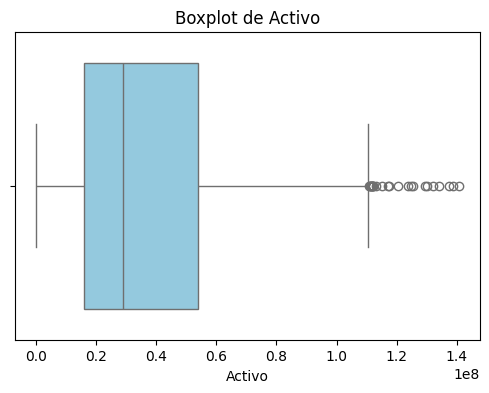

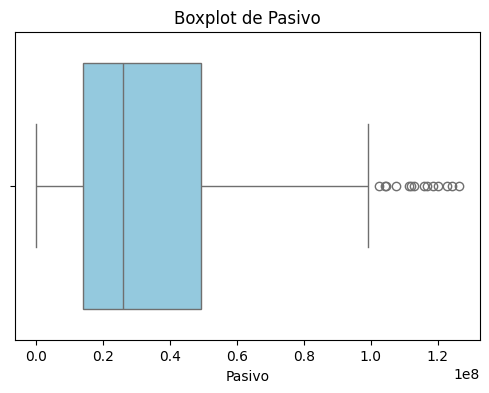

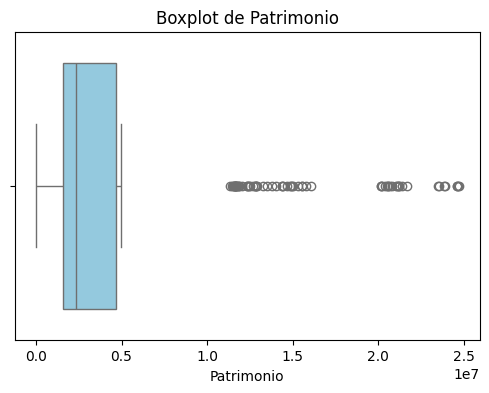

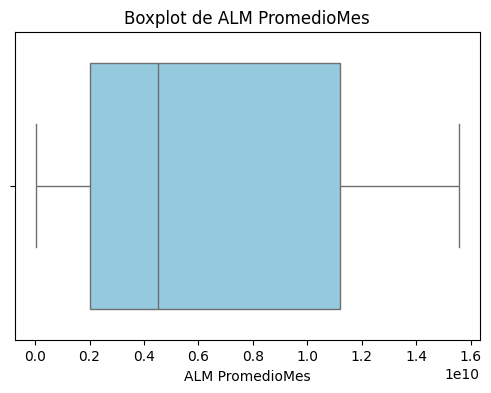

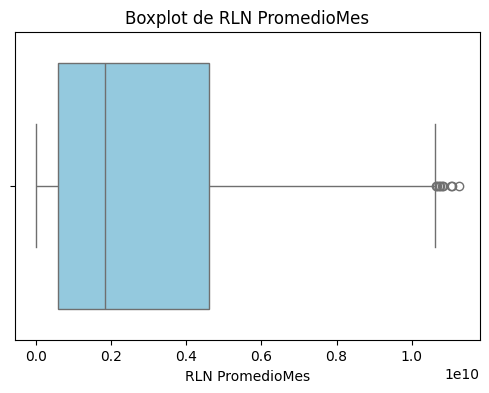

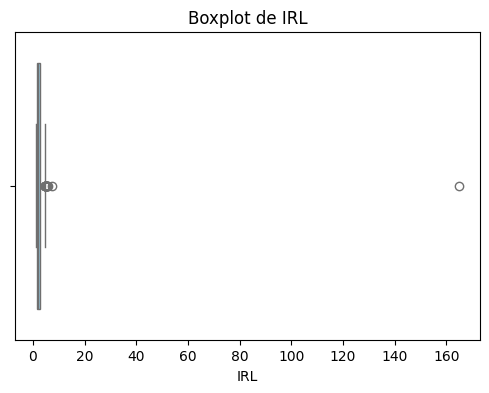

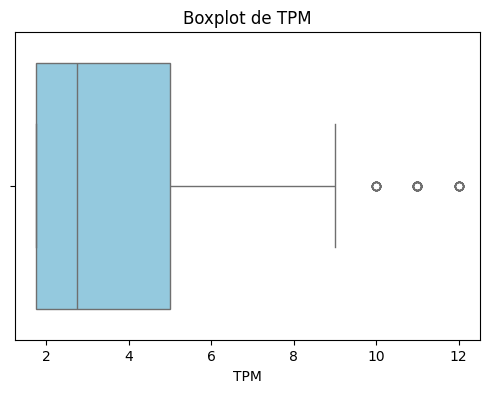

In [44]:


for col in cols_interes:
    if col in df_proyecto.columns: 
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df_proyecto[col], color="skyblue")
        plt.title(f"Boxplot de {col}")
        plt.show()
    else:
        print(f"⚠️ La columna {col} no está en el dataframe")

In [48]:

corr_matrix = df_proyecto.corr(numeric_only=True)
corr_irl = corr_matrix["IRL"].sort_values(ascending=False)

print("Correlaciones con respecto a IRL:")
print(corr_irl)

Correlaciones con respecto a IRL:
IRL                1.000000
TPM               -0.035942
Patrimonio        -0.097215
año               -0.098948
Activo            -0.113469
Pasivo            -0.114290
ALM PromedioMes   -0.114815
RLN PromedioMes   -0.118008
Name: IRL, dtype: float64


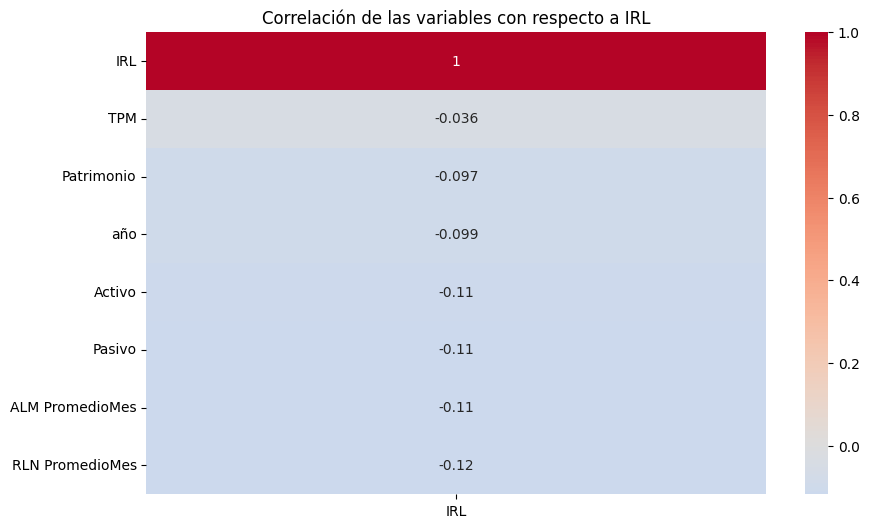

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix[["IRL"]].sort_values(by="IRL", ascending=False), 
            annot=True, cmap="coolwarm", center=0)
plt.title("Correlación de las variables con respecto a IRL")
plt.show()

In [50]:
corr_spearman = df_proyecto.corr(method='spearman', numeric_only=True)
print(corr_spearman["IRL"].sort_values(ascending=False))


IRL                1.000000
año               -0.236238
TPM               -0.269700
ALM PromedioMes   -0.429992
Patrimonio        -0.467803
Pasivo            -0.521618
Activo            -0.522229
RLN PromedioMes   -0.634474
Name: IRL, dtype: float64
